# Bemorlarni klassifikatsiya qilish
*   Model:Supervised
*   Algoritm:Klassifikatsiya
*   Usul:Ofline








In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import pickle
%matplotlib inline

In [70]:
df = pd.read_csv("/content/bodyPerformanceI.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,F,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,C
1,27.0,F,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,D
2,23.0,M,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,C
3,31.0,M,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,C
4,25.0,M,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,B


In [6]:
df.shape

(7015, 12)

In [7]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
df.info()   # gender ustunimiz ma'lumot turi object ekan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [9]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
mean,36.801283,168.751732,67.046887,22.642606,78.648952,130.364490,37.289624,15.790925,40.614597,191.824391
std,13.649180,8.256259,11.242355,6.796773,10.675237,14.538937,10.443406,6.973073,13.075697,38.528746
min,21.000000,125.000000,34.400000,3.500000,6.000000,43.900000,0.000000,-20.000000,0.000000,0.000000
25%,25.000000,162.900000,58.500000,17.800000,71.000000,120.000000,27.800000,11.800000,32.000000,163.000000
50%,32.000000,169.400000,67.400000,22.200000,79.000000,130.000000,38.700000,16.000000,42.000000,195.000000
75%,48.000000,174.700000,74.700000,27.100000,86.000000,141.000000,45.200000,20.000000,50.000000,222.000000
max,64.000000,193.800000,125.700000,54.900000,156.200000,193.000000,69.900000,213.000000,78.000000,295.000000


In [10]:
df["class"].value_counts()

B    3222
C    2565
A     617
D     611
Name: class, dtype: int64

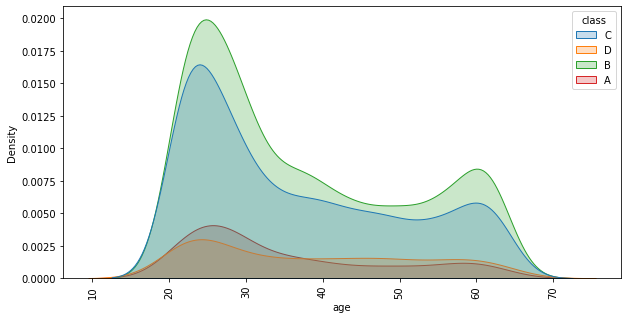

In [12]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='age', hue='class',shade=True)
plt.xticks(rotation=90)
plt.show()

Bundan ko'rishmiz mumkin asosiy ma'lumot B va C klasslarda 20~30 yosh orasiga og'ishini ko'rishimiz mumkin.

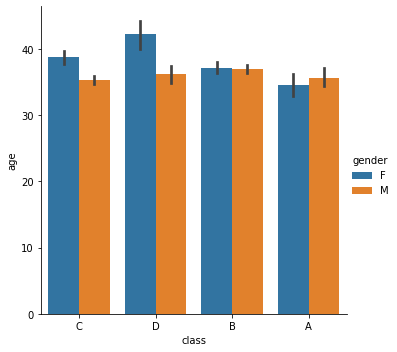

In [13]:
sns.catplot(data=df, kind="bar", x="class", y="age", hue="gender")
plt.show()

Bu yerda klasslarni jinsga oid yosh kesimida taqsimlanishini ko'rishimiz mumkin

In [73]:
df["class"] = df["class"].replace({"A":1,"B":2,"C":3,"D":4}) #klasslarni raqamlarga replace qildim,chunki korrelyatiya sonli ustunlar bilan ishlaydi
df["gender"] = df["gender"].replace({"F":1,"M":0}) # Female -> 1,Male -> 0 qilib o'zgartirdim

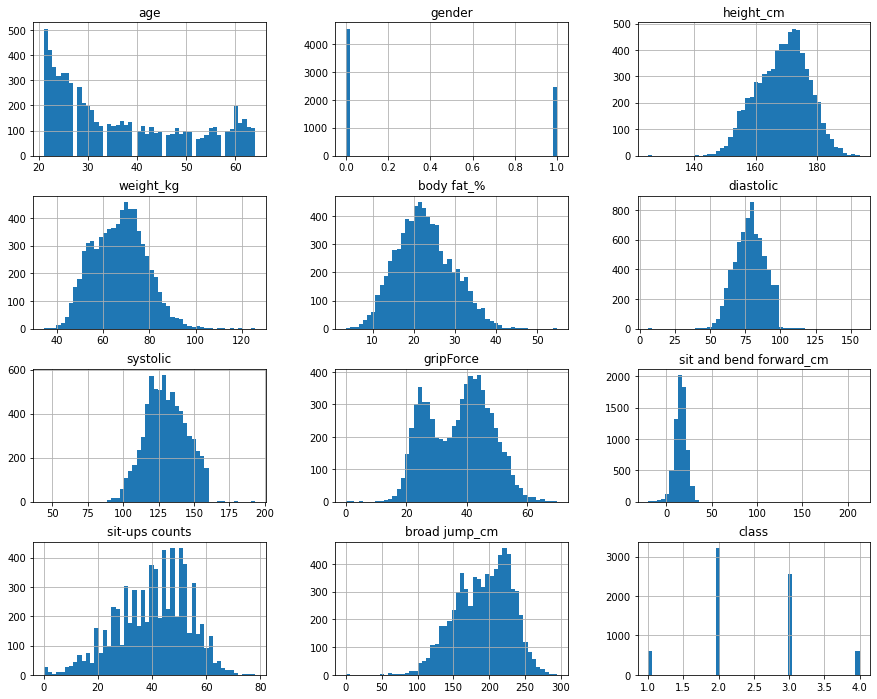

In [85]:
df.hist(bins=50, figsize=(15,12))
plt.show()  

Ushbu gistogramma orqali biz ma'lumotlarni normal distrubitsiya qonuniyatiga tushishini ko'rishimiz mumkin,
bilamizki data qancha normal distrubitsiyaga asoslansa aniqligi shuncha yaxshi bo'ladi

In [16]:
df.corrwith(df["class"]).abs().sort_values(ascending=False) 

class                      1.000000
sit and bend forward_cm    0.459989
sit-ups counts             0.317935
body fat_%                 0.216034
broad jump_cm              0.180268
weight_kg                  0.122481
gripForce                  0.100442
gender                     0.049443
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
dtype: float64

Demak class ustunimiz bilan boshqa ustunlar o'rtasidagi korrelyatsiya hammasida ham yaxshi emas ekan.
Quyida corr baland ustunlarni korishimiz mumkin

*  sit and bend 
*  forward_cm,sit-ups counts
*  body fat_%) 
korrelatsiya 

In [84]:
corr_matrix = df.corr().abs()  #
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
age,1.000000,0.058173,0.288286,0.107783,0.254779,0.157917,0.213870,0.177807,0.074414,0.579351,0.441600,0.024815
gender,0.058173,1.000000,0.723391,0.689779,0.602024,0.219270,0.321124,0.811698,0.356106,0.527542,0.727814,0.049443
height_cm,0.288286,0.723391,1.000000,0.761105,0.549119,0.131829,0.198731,0.739932,0.231173,0.537803,0.687134,0.031961
weight_kg,0.107783,0.689779,0.761105,1.000000,0.187030,0.246153,0.329220,0.752092,0.256686,0.404938,0.551703,0.122481
body fat_%,0.254779,0.602024,0.549119,0.187030,1.000000,0.042949,0.046007,0.547648,0.056892,0.579147,0.667964,0.216034
diastolic,0.157917,0.219270,0.131829,0.246153,0.042949,1.000000,0.660354,0.203949,0.064516,0.023916,0.098789,0.037550
systolic,0.213870,0.321124,0.198731,0.329220,0.046007,0.660354,1.000000,0.286073,0.093928,0.065862,0.159393,0.019069
gripForce,0.177807,0.811698,0.739932,0.752092,0.547648,0.203949,0.286073,1.000000,0.191545,0.582035,0.738526,0.100442
sit and bend forward_cm,0.074414,0.356106,0.231173,0.256686,0.056892,0.064516,0.093928,0.191545,1.000000,0.040480,0.070689,0.459989
sit-ups counts,0.579351,0.527542,0.537803,0.404938,0.579147,0.023916,0.065862,0.582035,0.040480,1.000000,0.740434,0.317935


Ma'lumotlarni train va test qilish uchun ikkiga bo'lib olishimiz kerak.

1.  Klasslarga oid ma'lumotlar o'rtasida farq kattani tashkil 
etgani bois,biz train_test_split orqali ikkiga bo'lganimizda A va D klasslarga oid ma'lumotlar train qismida emas,balki test qismida qolib ketib model aniqligini yo'qotishimiz mumkin.
2.  Ma'lumotlar o'rtasidagi balasni saqlash uchun Staritifiedsplitdan foydalandim







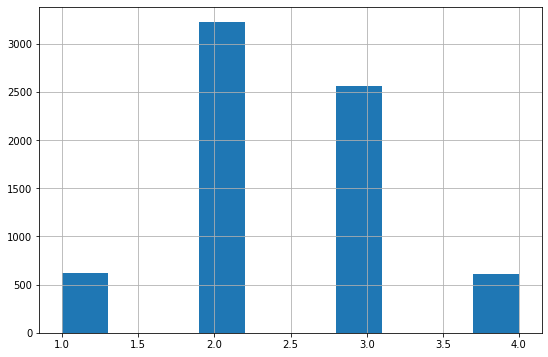

In [89]:
df['class'].hist(bins=10, figsize=(9,6)) 
plt.show()

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=21)
for train_index, test_index in stratified_split.split(df,df['class']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]



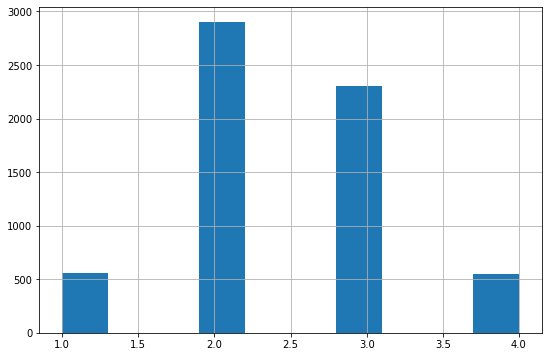

In [120]:
strat_train_set['class'].hist(bins=10, figsize=(9,6))
plt.show()   # balansni saqlagan holda ma'lumotlarni bo'lib oldik

In [121]:
x_train = strat_train_set.drop("class",axis=1).values
y_train = strat_train_set["class"].values

x_test = strat_test_set.drop('class',axis=1).values
y_test = strat_test_set["class"].values

## **Model quramiz**

DecisionTreeclassifier

In [122]:
tree_model = DecisionTreeClassifier() #DecisionTreeClassifierdan foydalanib model qurib ko'ramiz
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [123]:
predict = tree_model.predict(x_test)

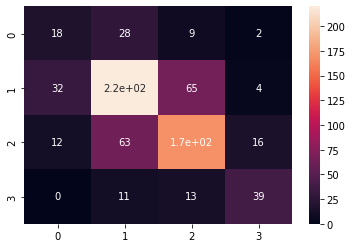

In [124]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)
plt.show()

In [125]:
print(classification_report(y_test, predict)) 

              precision    recall  f1-score   support

           1       0.32      0.29      0.30        62
           2       0.69      0.68      0.68       322
           3       0.65      0.66      0.66       257
           4       0.62      0.64      0.63        61

    accuracy                           0.64       702
   macro avg       0.57      0.57      0.57       702
weighted avg       0.63      0.64      0.64       702



In [130]:
print(f"Aniqlilik ehtimoli:{accuracy_score(predict,y_test)*100:.2f}%")

Aniqlilik ehtimoli:63.68%


RandomforestClassifier

In [146]:
RF_model = RandomForestClassifier(n_estimators=24)
RF_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=24)

In [147]:
predict = RF_model.predict(x_test)

In [148]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           1       0.19      0.55      0.29        22
           2       0.88      0.68      0.76       416
           3       0.69      0.78      0.73       227
           4       0.59      0.97      0.73        37

    accuracy                           0.72       702
   macro avg       0.59      0.74      0.63       702
weighted avg       0.78      0.72      0.74       702



In [149]:
print(f"Aniqlilik ehtimoli:{accuracy_score(predict,y_test)*100:.2f}%")

Aniqlilik ehtimoli:72.22%


In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(1, 25)}

knn_gscv = GridSearchCV(RF_model, param_grid, cv=5)

knn_gscv.fit(x_train, y_train)  #eng yaxshi n_estimatorni topish algoritmi

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=24),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [151]:
knn_gscv.best_params_   #n_estimator = 21  bo'lganda model aniqligi yuqori bo'lar ekan

{'n_estimators': 21}

In [152]:
RF_model = RandomForestClassifier(n_estimators=21)
RF_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=21)

In [153]:
predict = RF_model.predict(x_test)

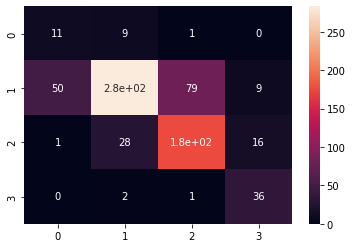

In [154]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)
plt.show() #endi yaxshiroq

In [155]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           1       0.18      0.52      0.27        21
           2       0.88      0.67      0.76       421
           3       0.68      0.80      0.74       221
           4       0.59      0.92      0.72        39

    accuracy                           0.72       702
   macro avg       0.58      0.73      0.62       702
weighted avg       0.78      0.72      0.74       702



In [156]:
print(f"Aniqlilik ehtimoli:{accuracy_score(predict,y_test)*100:.2f}%")

Aniqlilik ehtimoli:72.08%


XGBOOST

In [158]:
#xgboost ni ham tekshirib ko'rishimiz mumkin
xgb_model = XGBClassifier()

In [159]:
xgb_model.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [160]:
predict = xgb_model.predict(x_test)

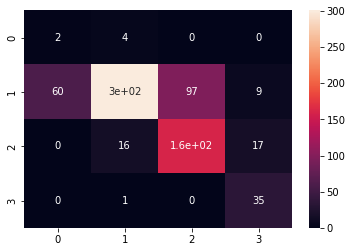

In [162]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)
plt.show() 

In [163]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           1       0.03      0.33      0.06         6
           2       0.93      0.64      0.76       467
           3       0.62      0.83      0.71       193
           4       0.57      0.97      0.72        36

    accuracy                           0.71       702
   macro avg       0.54      0.69      0.56       702
weighted avg       0.82      0.71      0.74       702



In [164]:
print(f"Aniqlilik ehtimoli:{accuracy_score(predict,y_test)*100:.2f}%")

Aniqlilik ehtimoli:70.94%


XGBOOST modelidan foydalaman.

## **Modelni saqlab olamiz....**

In [171]:
filename = 'xgb_model.pkl' 
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

In [173]:
# saqlagan modelimizni qayta ochish uchun ushbu koddan foydalanamiz..
with open(filename, 'rb') as file:
    xgb_model = pickle.load(file)